In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [8]:
# Show current directory
import os

In [9]:
# Load solution.npz
data = np.load('solution.npz')
rho = data['rho']
etab = data['etab']
etap = data['etap']
vx = data['vx']
vy = data['vy']
p = data['p']


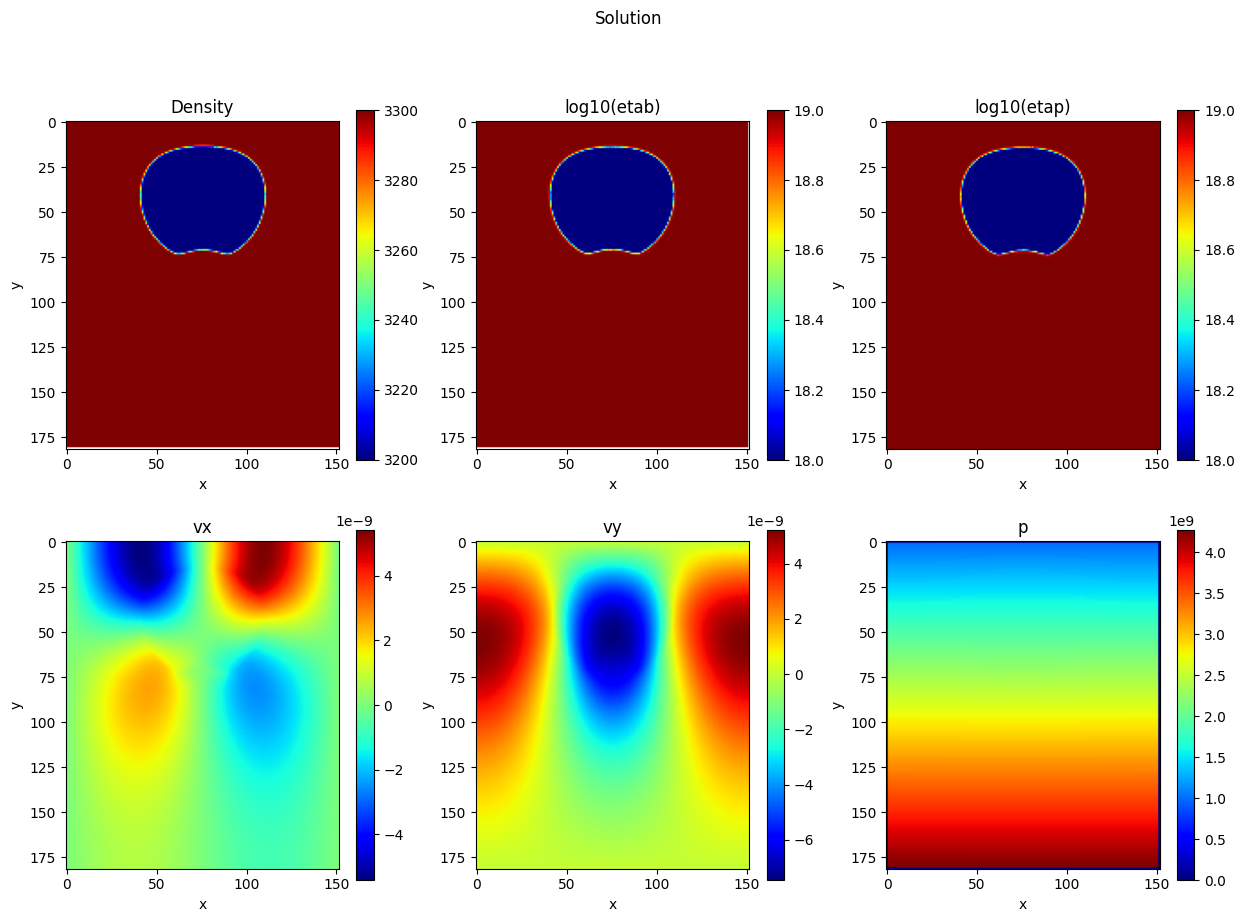

In [10]:
# Plot solution
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Solution')

rho_plt = axs[0, 0].imshow(rho, cmap='jet')
axs[0, 0].set_title('Density')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
fig.colorbar(rho_plt, ax=axs[0, 0])

etab_plt = axs[0, 1].imshow(np.log10(etab), cmap='jet')
axs[0, 1].set_title('log10(etab)')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')
fig.colorbar(etab_plt, ax=axs[0, 1])


etap_plt = axs[0, 2].imshow(np.log10(etap), cmap='jet')
axs[0, 2].set_title('log10(etap)')
axs[0, 2].set_xlabel('x')
axs[0, 2].set_ylabel('y')
fig.colorbar(etap_plt, ax=axs[0, 2])

# axs[1, 0].contourf(X, Y, vx, cmap='jet', levels=100)
vx_plt = axs[1, 0].imshow(vx, cmap='jet')
axs[1, 0].set_title('vx')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')
fig.colorbar(vx_plt, ax=axs[1, 0])

# axs[1, 1].contourf(X, Y, vy, cmap='jet', levels=100)
vy_plt = axs[1, 1].imshow(vy, cmap='jet')
axs[1, 1].set_title('vy')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')
fig.colorbar(vy_plt, ax=axs[1, 1])

# axs[1, 2].contourf(X, Y, p, cmap='jet', levels=100)
p_plt = axs[1, 2].imshow(p, cmap='jet')
axs[1, 2].set_title('p')
axs[1, 2].set_xlabel('x')
axs[1, 2].set_ylabel('y')
fig.colorbar(p_plt, ax=axs[1, 2])

plt.savefig('solution.pdf')